In [1]:
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
X_test, y_test = joblib.load("../models/test_data.pkl")


In [3]:
model_dir = "../models"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".pkl") and "test_data" not in f]

models = {}
for file in model_files:
    name = file.replace(".pkl", "").replace("_", " ").title()
    models[name] = joblib.load(os.path.join(model_dir, file))


 Evaluating: Lightgbm
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    454265
   Malicious       1.00      0.99      0.99    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



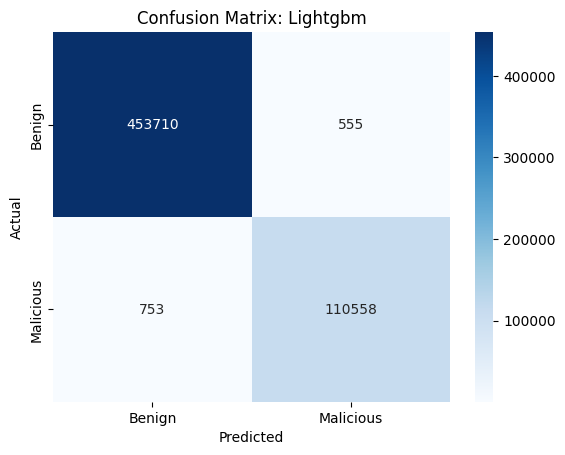

 Evaluating: Linear Svm
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.95    454265
   Malicious       0.84      0.73      0.78    111311

    accuracy                           0.92    565576
   macro avg       0.89      0.85      0.87    565576
weighted avg       0.92      0.92      0.92    565576



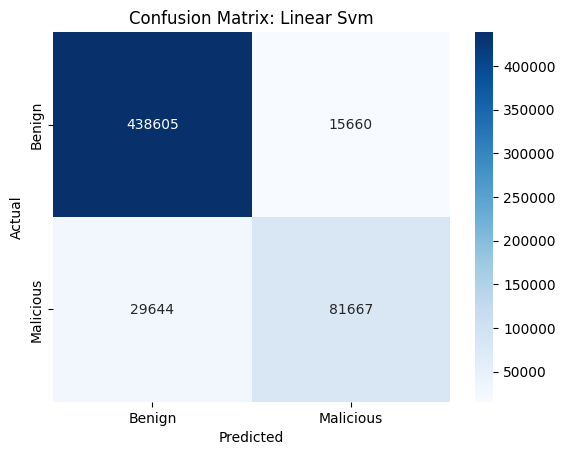

 Evaluating: Logistic Regression
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.95    454265
   Malicious       0.82      0.79      0.81    111311

    accuracy                           0.93    565576
   macro avg       0.89      0.88      0.88    565576
weighted avg       0.92      0.93      0.92    565576



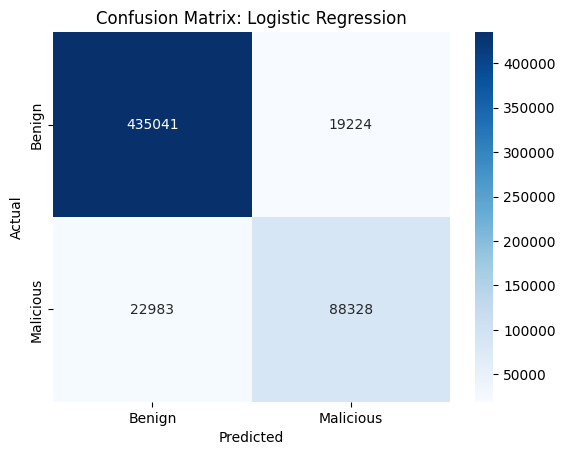

 Evaluating: Mlp Classifier
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99    454265
   Malicious       0.91      0.98      0.95    111311

    accuracy                           0.98    565576
   macro avg       0.95      0.98      0.97    565576
weighted avg       0.98      0.98      0.98    565576



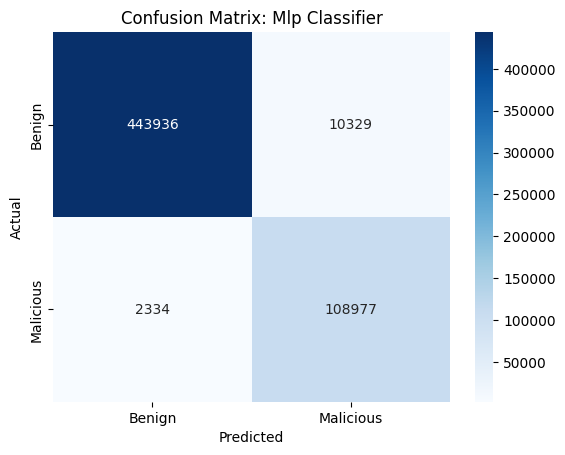

 Evaluating: Random Forest
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    454265
   Malicious       1.00      1.00      1.00    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



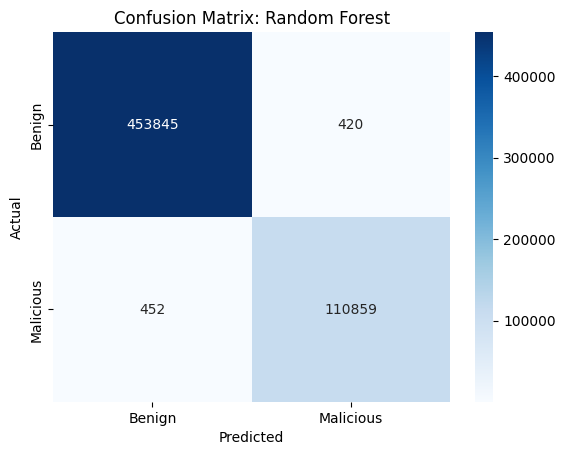

 Evaluating: Xgboost
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    454265
   Malicious       1.00      1.00      1.00    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



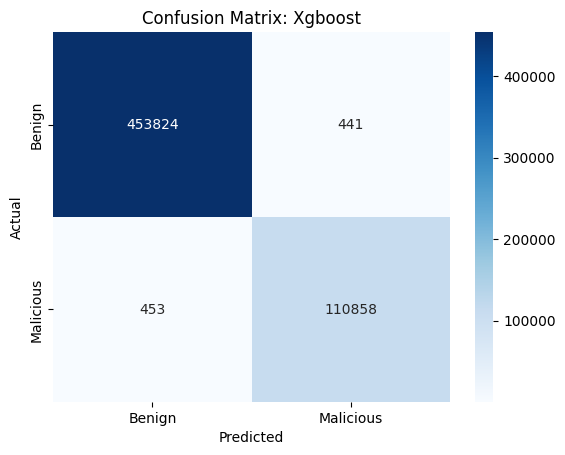

In [4]:
for name, model in models.items():
    print(f" Evaluating: {name}")
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"]))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    })

df_summary = pd.DataFrame(summary).sort_values("F1 Score", ascending=False)
display(df_summary)


,Model,Accuracy,Precision,Recall,F1 Score
4,Random Forest,0.998458,0.996226,0.995939,0.996082
5,Xgboost,0.998419,0.996038,0.995930,0.995984
0,Lightgbm,0.997687,0.995005,0.993235,0.994119
3,Mlp Classifier,0.977610,0.913424,0.979032,0.945091
2,Logistic Regression,0.925373,0.821259,0.793524,0.807153
1,Linear Svm,0.919898,0.839099,0.733683,0.782858
